# GT and Motor Vehicle Theft in Cities in the United States

## GT Weekly City level data

In [1]:
import pandas as pd
import numpy as np
import os
import re
import glob
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Top 50 the most populous cities in the U.S.
region_code_dict = {
    "US-NY-501" : "New York NY",
    "US-CA-807" : "San Francisco-Oakland-San Jose CA", #including Oakland, CA and San Jose CA
    "US-CA-803" : "Los Angeles CA", #including Long Beach, CA
    "US-CA-825" : "San Diego CA", 
    #"US-CA-862" : "Sacramento-Stockton-Modesto CA",
    "US-AZ-753" : "Phoenix AZ", #including Mesa, AZ
    "US-MI-505" : "Detroit MI",
    "US-NC-517" : "Charlotte NC",
    "US-OH-535" : "Columbus OH",
    "US-FL-561" : "Jacksonville FL",
    "US-MD-511" : "Washington DC (Hagerstown MD)", # including Arlington VA
    "US-OK-650" : "Oklahoma City OK",
    "US-TX-765" : "El Paso TX",
    "US-OR-820" : "Portland OR",
    "US-MD-512" : "Baltimore MD",
    "US-WI-617" : "Milwaukee WI",
    "US-NM-790" : "Albuquerque-Santa Fe NM",
    "US-CA-866" : "Fresno-Visalia CA",
    "US-MO-616" : "Kansas City MO",
    "US-NE-652" : "Omaha NE",
    "US-CO-752" : "Colorado Springs-Pueblo CO",
    "US-NC-560" : "Raleigh-Durham (Fayetteville) NC",
    "US-VA-544" : "Norfolk-Portsmouth-Newport News VA", #including Virginia Beach, VA
    "US-FL-528" : "Miami-Ft. Lauderdale FL",
    "US-CA-800" : "Bakersfield CA",
    "US-OK-671" : "Tulsa OK",
    "US-KS-678" : "Wichita-Hutchinson KS"  ,
    "US-NV-839" : "Las Vegas NV",
    "US-WA-819" : "Seattle-Tacoma WA",
    "US-CO-751" : "Denver CO", #including Aurora, CO
    "US-PA-504" : "Philadelphia PA",
    "US-GA-524" : "Atlanta GA",
    "US-IN-602" : "Chicago IL",
    "US-NH-506" : "Boston MA-Manchester NH",
    "CA-ON" : "Ontario",
    "US-KY-529" : "Louisville KY",
    "US-TN-640" : "Memphis TN",
    "US-WI-613" : "Minneapolis-St. Paul MN",
    "US-TN-659" : "Nashville TN",
    "US-AZ-789" : "Tucson AZ",
    "US-TX-623" : "Dallas-Ft. Worth TX", # including Fort Worth, TX
    "US-TX-641" : "San Antonio TX",
    "US-TX-618" : "Houston TX",
    "US-TX-635" : "Austin TX",
}

In [3]:
filelist = os.listdir()

In [4]:
#get city name
for city_name in region_code_dict.values():
    #get the list of files which contain 'city_name'
    city_file_list = glob.glob(f"{city_name}_weekly_[0-9]*")
    #empty list to store temp_df
    list1 = []
    for file_name in city_file_list:
        temp_df = pd.read_csv(file_name, index_col=0)
        list1.append(temp_df)
    #concate temp_dfs and drop duplicated date columns and calculate the mean
    df1 = pd.concat(list1, axis=1)
    final_df_mean = df1.T.drop_duplicates().T.mean(axis = 1)
    #normalize data to maximum = 100 (similar as Google Trends)
    final_df_mean = round(final_df_mean/final_df_mean.max()*100, 3)
    
    #add index name and column name
    final_df_mean.index.name = 'date'
    final_df_mean.name = city_name
    #write into a total csv file
    final_df_mean.sort_index().to_csv(f'{city_name}_weekly_total.csv')



In [5]:
#combine all citie's mean values into one csv file
city_total_list = glob.glob(f"*total.csv")
list2 = []
for file_name in city_total_list:
    temp_df2 = pd.read_csv(file_name, index_col=0)
    list2.append(temp_df2)
    import pdb
    #pdb.set_trace()
df2 = pd.concat(list2, axis=1)


df2.sort_index().to_csv(f'all_cities_weekly.csv')

In [6]:
df2[df2.index < '2020-04-30']

,Albuquerque-Santa Fe NM,Atlanta GA,Austin TX,Bakersfield CA,Baltimore MD,Boston MA-Manchester NH,Charlotte NC,Chicago IL,Colorado Springs-Pueblo CO,Columbus OH,...,Portland OR,Raleigh-Durham (Fayetteville) NC,San Antonio TX,San Diego CA,San Francisco-Oakland-San Jose CA,Seattle-Tacoma WA,Tucson AZ,Tulsa OK,Washington DC (Hagerstown MD),Wichita-Hutchinson KS
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,30.506,42.597,NaN,NaN,24.000,NaN,57.105,13.672,22.000,26.237,...,28.291,NaN,30.311,40.579,73.418,71.678,NaN,59.000,52.808,NaN
2017-01-08,23.740,38.752,32.571,NaN,49.000,29.160,52.623,36.506,35.000,NaN,...,45.685,31.800,NaN,51.952,48.945,38.265,61.986,21.000,40.549,25.657
2017-01-22,72.171,40.675,24.000,42.753,44.000,31.797,NaN,28.167,42.000,NaN,...,37.197,24.000,61.744,26.765,55.274,52.505,NaN,30.000,27.382,40.861
2017-01-29,38.934,33.794,NaN,31.136,24.000,NaN,19.228,35.888,NaN,19.325,...,NaN,38.000,28.290,29.528,50.211,NaN,NaN,45.500,38.726,36.110
2017-02-05,32.287,39.056,23.250,NaN,69.000,27.769,35.644,16.742,NaN,22.852,...,29.077,29.333,44.905,35.522,37.553,60.566,25.748,NaN,39.816,17.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-09,NaN,21.113,NaN,NaN,NaN,17.311,28.915,13.319,46.002,NaN,...,70.524,21.600,24.950,NaN,50.633,49.014,100.000,61.655,86.570,NaN
2020-03-01,NaN,35.607,NaN,17.659,27.919,NaN,27.749,20.138,NaN,50.395,...,29.535,18.822,36.032,37.882,30.380,64.577,18.119,80.975,39.544,20.931
2020-03-29,NaN,17.763,19.828,12.638,77.357,15.165,35.607,10.181,NaN,NaN,...,20.928,NaN,41.181,29.447,35.443,37.992,13.351,NaN,21.450,38.010


In [7]:
#keep the colums with less than 25% missing values
keep_columns = df2.columns[df2.isna().sum()/len(df2)*100 < 25]
df3 = df2[keep_columns]

In [8]:
#check for null and non-null counts of each cities
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 2017-01-01 to 2022-12-25
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Albuquerque-Santa Fe NM             266 non-null    float64
 1   Atlanta GA                          312 non-null    float64
 2   Austin TX                           262 non-null    float64
 3   Baltimore MD                        253 non-null    float64
 4   Boston MA-Manchester NH             285 non-null    float64
 5   Charlotte NC                        276 non-null    float64
 6   Chicago IL                          313 non-null    float64
 7   Columbus OH                         244 non-null    float64
 8   Dallas-Ft. Worth TX                 312 non-null    float64
 9   Denver CO                           298 non-null    float64
 10  Detroit MI                          300 non-null    float64
 11  Houston TX                        

In [9]:
df3.interpolate(method ='linear', limit_direction ='backward', inplace=True)
df3.interpolate(method ='linear', limit_direction ='forward', inplace=True)

C:\Users\tosea\AppData\Local\Temp\ipykernel_67604\2683336654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.interpolate(method ='linear', limit_direction ='backward', inplace=True)
C:\Users\tosea\AppData\Local\Temp\ipykernel_67604\2683336654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.interpolate(method ='linear', limit_direction ='forward', inplace=True)


In [10]:
#plus one day to align with city level data
df3.index = pd.to_datetime(df3.index) + pd.Timedelta(1, unit="day")

In [11]:
df3 = df3[df3.index > '2017-01-01']

In [12]:
df3 = df3[df3.index < '2020-04-14']

In [13]:
df4 = df3.stack()

In [14]:
df4 = df4.reset_index()

In [15]:
df4.columns = ['date', 'dma', 'MVT_GT']

## Population Data

In [16]:
dma_city_walk = {'Austin, TX':'Austin TX',
                 'Boston, MA':'Boston MA-Manchester NH', 
                 'Chicago, IL':'Chicago IL', 
                 'Dallas, TX':'Dallas-Ft. Worth TX',
                 'Los Angeles, CA':'Los Angeles CA', 
                 'Louisville, KY':'Louisville KY',
                 'Memphis, TN':'Memphis TN',
                 'Minneapolis, MN':'Minneapolis-St. Paul MN', 
                 'Nashville, TN':'Nashville TN',
                 'Philadelphia, PA':'Philadelphia PA',
                 'Phoenix, AZ':'Phoenix AZ',
                 'San Francisco, CA':"San Francisco-Oakland-San Jose CA",
                 'Washington, DC':'Washington DC (Hagerstown MD)'}

In [17]:
#[i.split(',')[0] for i in dma_city_walk.keys()]

In [18]:
#pop_2017_2019 = pd.read_csv("sub-est2019_all.csv", encoding = "ISO-8859-1")

In [19]:
#pop_2017_2019.head()

In [20]:
#pop_2017_2019[pop_2017_2019.NAME.str.contains('|'.join([i.split(',')[0] for i in dma_city_walk.keys()])) & (pop_2017_2019.POPESTIMATE2019 > 450000)]

## Crime Counts Data 
Ashby, M.P.J. Initial evidence on the relationship between the coronavirus pandemic and crime in the United States. Crime Sci 9, 6 (2020). https://doi.org/10.1186/s40163-020-00117-6

In [21]:
crime_count_df = pd.read_csv("crime_counts (Matthew P J Ashby).csv")

In [22]:
crime_count_df = crime_count_df[crime_count_df.category.str.contains("theft of vehicle")]

In [23]:
crime_count_df2 = crime_count_df.iloc[:,[0,2,4]]

In [24]:
crime_count_df2.columns = ['city', 'date', 'MVT_counts']

In [25]:
crime_count_df2.index = crime_count_df2.date

In [26]:
crime_count_df3 = crime_count_df2[crime_count_df2.index > '2017-01-01']

In [27]:
dma_city_walk = {'Austin, TX':'Austin TX',
                 'Boston, MA':'Boston MA-Manchester NH', 
                 'Chicago, IL':'Chicago IL', 
                 'Dallas, TX':'Dallas-Ft. Worth TX',
                 'Los Angeles, CA':'Los Angeles CA', 
                 'Louisville, KY':'Louisville KY',
                 'Memphis, TN':'Memphis TN',
                 'Minneapolis, MN':'Minneapolis-St. Paul MN', 
                 'Nashville, TN':'Nashville TN',
                 'Philadelphia, PA':'Philadelphia PA',
                 'Phoenix, AZ':'Phoenix AZ',
                 'San Francisco, CA':"San Francisco-Oakland-San Jose CA",
                 'Washington, DC':'Washington DC (Hagerstown MD)'}

In [28]:
[print(i) for i in dma_city_walk.keys()]

Austin, TX
Boston, MA
Chicago, IL
Dallas, TX
Los Angeles, CA
Louisville, KY
Memphis, TN
Minneapolis, MN
Nashville, TN
Philadelphia, PA
Phoenix, AZ
San Francisco, CA
Washington, DC


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [29]:
crime_count_df3['dma'] = crime_count_df3.city.map(dma_city_walk)

C:\Users\tosea\AppData\Local\Temp\ipykernel_67604\3053388599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_count_df3['dma'] = crime_count_df3.city.map(dma_city_walk)


In [30]:
#filter out values without dma match
crime_count_df4 = crime_count_df3[~crime_count_df3.dma.isna()].iloc[:,[2,3]]
crime_count_df4  = crime_count_df4.reset_index()
crime_count_df4.date = pd.to_datetime(crime_count_df4.reset_index().date)

In [31]:
#GET ALL WEEK DATES ON CRIME COUNT INDEX
crime_count_df5 = df4.merge(crime_count_df4, on = ['date', 'dma'], how = 'outer').iloc[:,[0,1,3]].set_index(['date', 'dma']).unstack()

In [32]:
#impute missing values and normalize the counts into 0-100  
crime_count_df5.interpolate(method ='linear', limit_direction ='backward', inplace=True)
crime_count_df5.interpolate(method ='linear', limit_direction ='forward', inplace=True)
crime_count_df5_normalized = round(crime_count_df5/crime_count_df5.max()*100, 3)

In [33]:
#drop all na and ready to merge
crime_count_df6_normalized = crime_count_df5_normalized.dropna(axis = 1, how = 'all').stack().reset_index()

## Merge Crime Count and GT

In [34]:
#merge with GT
final_data = crime_count_df6_normalized.merge(df4, on = ['date', 'dma'] ,how = 'left')

In [35]:
final_data.date = pd.to_datetime(final_data.date)

## Time Series Analysis

In [36]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from pandas.tseries.offsets import Day, BMonthEnd, MonthEnd
import pytz

In [37]:
final_data_index = final_data.set_index(['date', 'dma'])

In [38]:
final_data.corr()

C:\Users\tosea\AppData\Local\Temp\ipykernel_67604\4285913857.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_data.corr()


,MVT_counts,MVT_GT
MVT_counts,1.000000,0.174289
MVT_GT,0.174289,1.000000


In [39]:
final_data

,date,dma,MVT_counts,MVT_GT
0,2017-01-02,Austin TX,36.170,32.571
1,2017-01-02,Boston MA-Manchester NH,56.000,29.160
2,2017-01-02,Chicago IL,99.329,13.672
3,2017-01-02,Dallas-Ft. Worth TX,65.737,48.865
4,2017-01-02,Los Angeles CA,81.385,44.240
...,...,...,...,...
2231,2020-04-13,Nashville TN,25.137,34.895
2232,2020-04-13,Philadelphia PA,100.000,24.386
2233,2020-04-13,Phoenix AZ,72.414,38.723
2234,2020-04-13,San Francisco-Oakland-San Jose CA,56.209,37.975


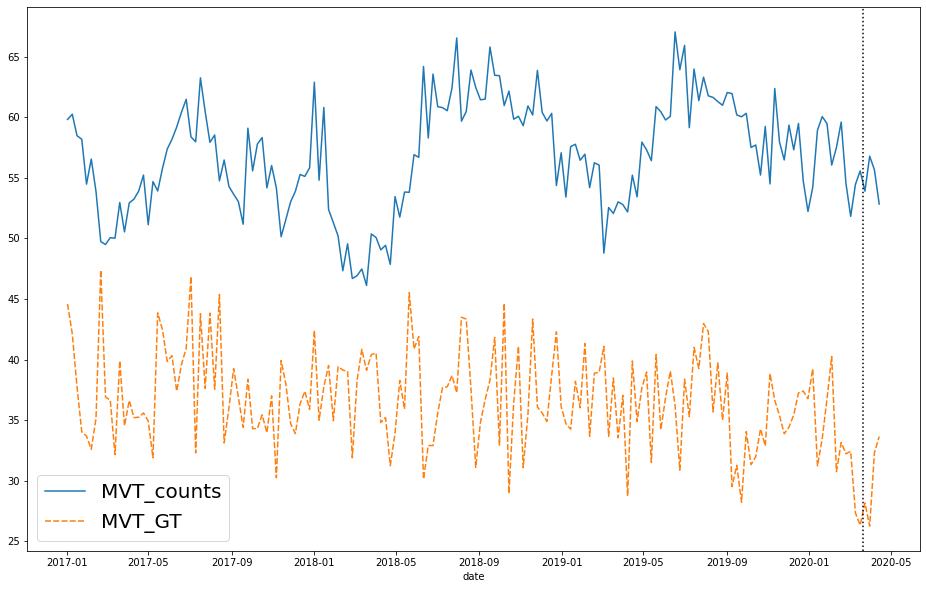

In [40]:
fig, ax = plt.subplots(figsize=(16,10))
gfg = sns.lineplot(final_data[['date', 'MVT_counts', "MVT_GT"]].groupby('date').mean())
treatment_time = datetime(2020, 3, 20)
ax.axvline(treatment_time, c="k", ls=":")
gfg.legend(fontsize = 20)
plt.show()

In [41]:
final_data

,date,dma,MVT_counts,MVT_GT
0,2017-01-02,Austin TX,36.170,32.571
1,2017-01-02,Boston MA-Manchester NH,56.000,29.160
2,2017-01-02,Chicago IL,99.329,13.672
3,2017-01-02,Dallas-Ft. Worth TX,65.737,48.865
4,2017-01-02,Los Angeles CA,81.385,44.240
...,...,...,...,...
2231,2020-04-13,Nashville TN,25.137,34.895
2232,2020-04-13,Philadelphia PA,100.000,24.386
2233,2020-04-13,Phoenix AZ,72.414,38.723
2234,2020-04-13,San Francisco-Oakland-San Jose CA,56.209,37.975


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Austin TX'),
  Text(1, 0, 'Boston MA-Manchester NH'),
  Text(2, 0, 'Chicago IL'),
  Text(3, 0, 'Dallas-Ft. Worth TX'),
  Text(4, 0, 'Los Angeles CA'),
  Text(5, 0, 'Louisville KY'),
  Text(6, 0, 'Memphis TN'),
  Text(7, 0, 'Minneapolis-St. Paul MN'),
  Text(8, 0, 'Nashville TN'),
  Text(9, 0, 'Philadelphia PA'),
  Text(10, 0, 'Phoenix AZ'),
  Text(11, 0, 'San Francisco-Oakland-San Jose CA'),
  Text(12, 0, 'Washington DC (Hagerstown MD)')])

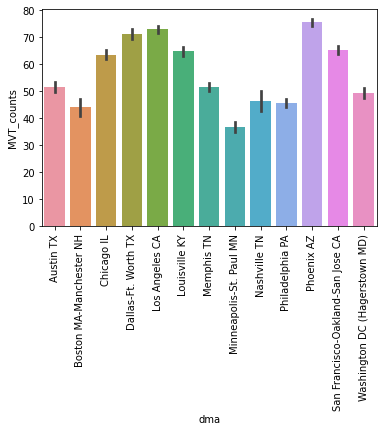

In [42]:
#final_data.groupby('dma').mean()

sns.barplot(data=final_data, x="dma", y='MVT_counts')
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Austin TX'),
  Text(1, 0, 'Boston MA-Manchester NH'),
  Text(2, 0, 'Chicago IL'),
  Text(3, 0, 'Dallas-Ft. Worth TX'),
  Text(4, 0, 'Los Angeles CA'),
  Text(5, 0, 'Louisville KY'),
  Text(6, 0, 'Memphis TN'),
  Text(7, 0, 'Minneapolis-St. Paul MN'),
  Text(8, 0, 'Nashville TN'),
  Text(9, 0, 'Philadelphia PA'),
  Text(10, 0, 'Phoenix AZ'),
  Text(11, 0, 'San Francisco-Oakland-San Jose CA'),
  Text(12, 0, 'Washington DC (Hagerstown MD)')])

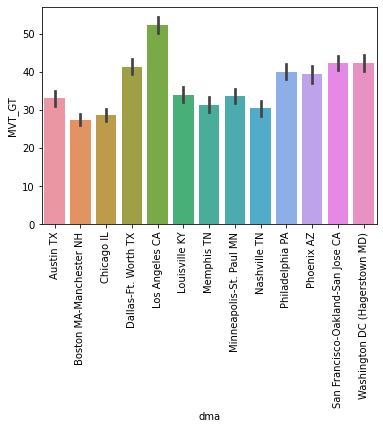

In [43]:
sns.barplot(data=final_data, x="dma", y='MVT_GT')
plt.xticks(rotation=90)

In [44]:
final_data_index.MVT_GT.unstack()

dma,Austin TX,Boston MA-Manchester NH,Chicago IL,Dallas-Ft. Worth TX,Los Angeles CA,Louisville KY,Memphis TN,Minneapolis-St. Paul MN,Nashville TN,Philadelphia PA,Phoenix AZ,San Francisco-Oakland-San Jose CA,Washington DC (Hagerstown MD)
date,,,,,,,,,,,,,
2017-01-02,32.5710,29.160,13.672,48.865,44.240,46.200,29.545,29.657,36.398,51.613,91.588,73.418,52.808
2017-01-09,32.5710,29.160,36.506,45.386,61.397,25.000,40.202,39.067,56.047,52.199,40.706,48.945,40.549
2017-01-16,42.0000,13.812,34.955,27.516,70.588,30.250,55.892,39.922,16.800,68.035,26.168,38.397,26.153
2017-01-23,24.0000,31.797,28.167,42.223,44.363,28.000,40.693,24.334,19.005,54.106,23.260,55.274,27.382
2017-01-30,23.6250,29.783,35.888,42.901,52.328,29.000,19.192,30.369,20.293,26.510,39.090,50.211,38.726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-16,22.9055,14.963,8.145,15.656,53.230,45.149,18.020,20.817,19.792,42.074,33.437,18.565,29.591
2020-03-23,18.6930,15.361,17.149,15.656,26.063,15.333,13.285,35.943,25.125,35.940,45.067,27.848,74.808
2020-03-30,19.8280,15.165,10.181,32.379,34.315,23.443,44.444,31.141,21.480,30.373,21.807,35.443,21.450


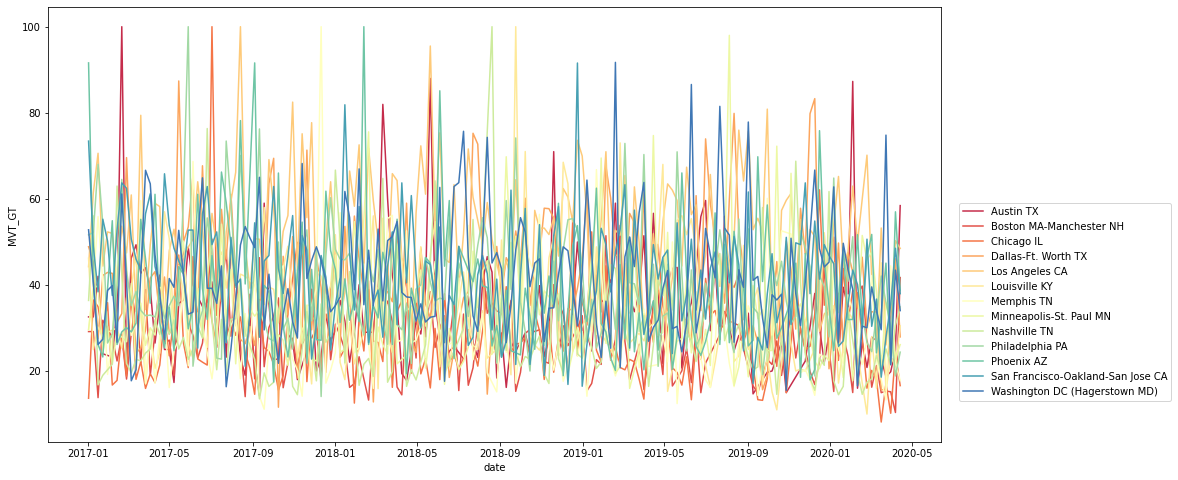

In [45]:
plt.figure(figsize=(16,8))
sns.lineplot(final_data, x = 'date', y = 'MVT_GT', hue = 'dma', palette =("Spectral"))

plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

#sns.lineplot(x = "date", y = "MVT_counts", data = final_data)

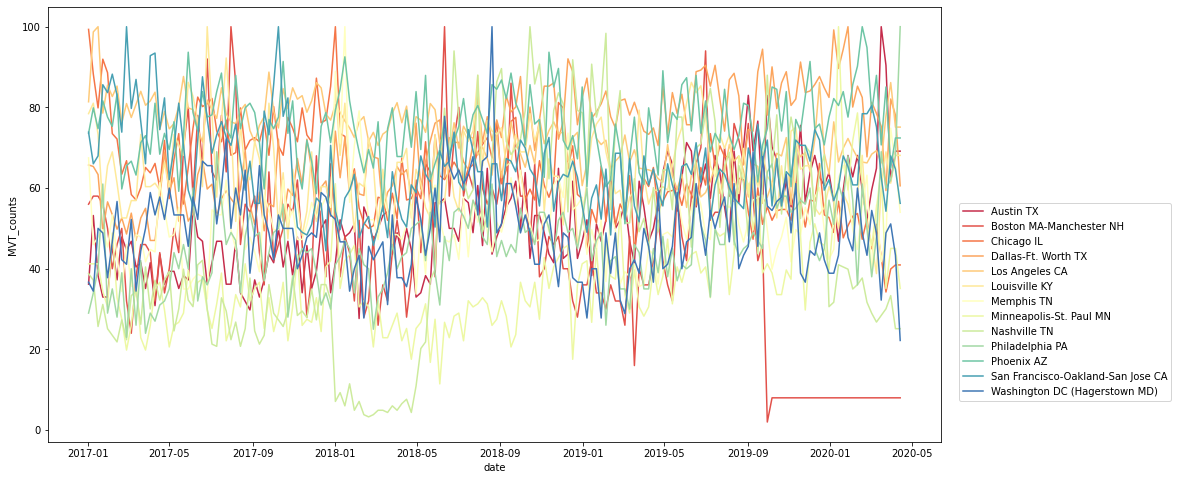

In [46]:
plt.figure(figsize=(16,8))
sns.lineplot(final_data, x = 'date', y = 'MVT_counts', hue = 'dma', palette =("Spectral"))
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

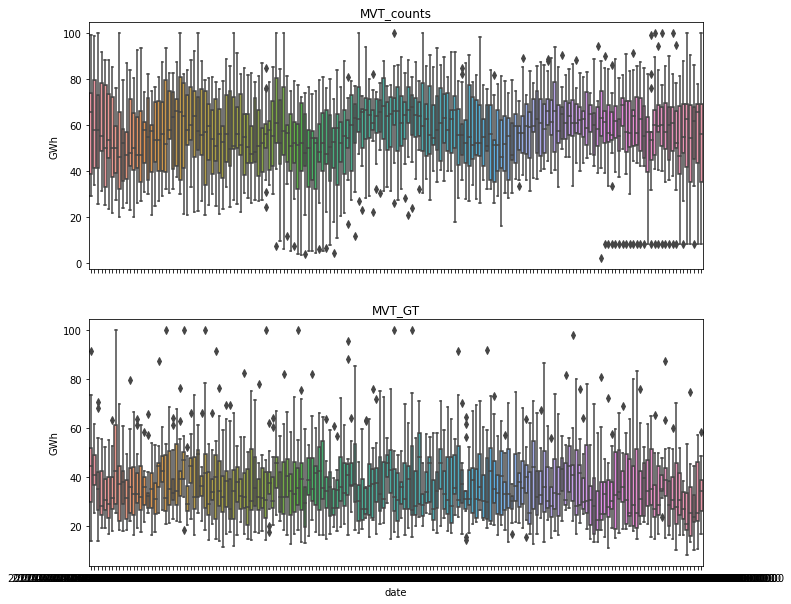

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['MVT_counts', 'MVT_GT'],axes):
    sns.boxplot(data=final_data, x='date', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

In [48]:
import graphviz
dot = graphviz.Digraph(comment='The Round Table')
dot.name
dot.node('A', 'COVID-19 Lockdown (W)')  # doctest: +NO_EXE
dot.node('B', 'MVT Google Trends (T)')
dot.node('L', 'MVT Counts (Y)')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')


dot.attr(label=r'E[Y | T, W]')


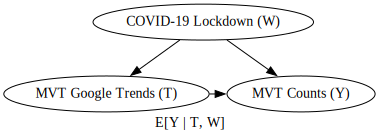

In [49]:
dot

In [50]:
final_data['covid_lock_down'] = np.where(final_data.reset_index().date > '2020-03-15', 1, 0)
final_data['start_date'] = datetime(2020, 3, 20)
final_data['start_date'].dt.to_period('W')
final_data['time_delta_weeks'] = np.where(final_data['date'] > final_data['start_date'] ,final_data['date'].dt.to_period('W').astype(int) - final_data['start_date'].dt.to_period('W').astype(int), 0)

C:\Users\tosea\AppData\Local\Temp\ipykernel_67604\1254442411.py:4: FutureWarning: The behavior of .astype from period[W-SUN] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  final_data['time_delta_weeks'] = np.where(final_data['date'] > final_data['start_date'] ,final_data['date'].dt.to_period('W').astype(int) - final_data['start_date'].dt.to_period('W').astype(int), 0)


In [51]:
final_data['date2'] = final_data.date.map(datetime.toordinal)

In [52]:
df = final_data[['date2','dma', 'MVT_counts', 'covid_lock_down', 'time_delta_weeks']].sort_values(['date2', 'dma']).copy()

In [53]:
def ITS_func(df, depedent_variable, date, intervention, time_delta_months):
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    model = smf.ols(formula=f'{depedent_variable} ~  {date} + {intervention} + {time_delta_months}', data=df)
    res = model.fit()
    res.resid.plot(kind="kde")
    return res, model

In [54]:
dma_list = list(set(df['dma']))

In [55]:
dma_list.sort()

********** Austin TX **********
                            OLS Regression Results                            
Dep. Variable:             MVT_counts   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     84.97
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.70e-33
Time:                        00:55:07   Log-Likelihood:                -596.66
No. Observations:                 172   AIC:                             1201.
Df Residuals:                     168   BIC:                             1214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercep

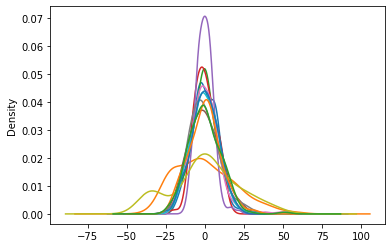

In [56]:
import pdb
sig_dma_list_MVT_counts = []
for dma in dma_list:
    
    res, model = ITS_func(df[df['dma'] == dma], 'MVT_counts', 'date2', 'covid_lock_down', 'time_delta_weeks')
    #pdb.set_trace()
    if res.pvalues[2] < 0.1:
        sig_dma_list_MVT_counts.append(dma)
        print(10*'*', dma, 10*'*')
        print(res.summary())
        print('\n\n')

    else:
        continue
        

In [57]:
len(sig_dma_list_MVT_counts)

5

In [58]:
df2 = final_data[['date2','dma', 'MVT_GT', 'covid_lock_down', 'time_delta_weeks']].sort_values(['date2', 'dma']).copy()

In [59]:
dma_list2 = list(set(df2['dma']))

In [60]:
df2 = df2.dropna(how = 'any')

********** Dallas-Ft. Worth TX **********
                            OLS Regression Results                            
Dep. Variable:                 MVT_GT   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.056
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.108
Time:                        00:55:08   Log-Likelihood:                -704.16
No. Observations:                 172   AIC:                             1416.
Df Residuals:                     168   BIC:                             1429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

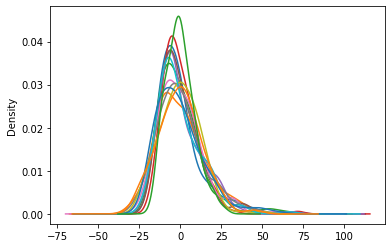

In [61]:
sig_dma_list_MVT_GT = []


for dma in dma_list2:
    try:
        res, model = ITS_func(df2[df2['dma'] == dma], 'MVT_GT', 'date2', 'covid_lock_down', 'time_delta_weeks')
        
        if res.pvalues[2] < 0.05:
            sig_dma_list_MVT_GT.append(dma)
            print(10*'*', dma, 10*'*')
            print(res.summary())
            print('\n\n')

        else:
            pass

    except ValueError:  #raised if `y` is empty.
        pass
    
        

In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula='MVT_counts ~  date2 + covid_lock_down + time_delta_weeks', data=final_data)
res = model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             MVT_counts   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.407
Date:                Wed, 15 Mar 2023   Prob (F-statistic):            0.00425
Time:                        00:55:08   Log-Likelihood:                -9645.6
No. Observations:                2236   AIC:                         1.930e+04
Df Residuals:                    2232   BIC:                         1.932e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2936.7722    848.138  

In [63]:
'''
The model estimates that the motor vehicle crime counts decreased 3.29% after the covid-19 lockdown 
but this effect is not statistically significant (P>∣t∣ is 0.595).


The figure below depicts how the model fits before and after intervention and how it project a counterfactual would be:

'''

'\nThe model estimates that the motor vehicle crime counts decreased 3.29% after the covid-19 lockdown \nbut this effect is not statistically significant (P>∣t∣ is 0.595).\n\n\nThe figure below depicts how the model fits before and after intervention and how it project a counterfactual would be:\n\n'

<AxesSubplot:ylabel='Density'>

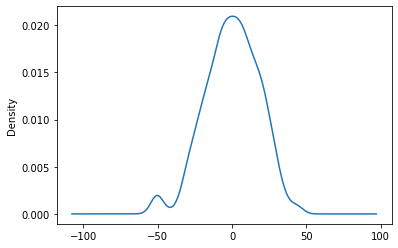

In [64]:
res.resid.plot(kind="kde")

In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula='MVT_GT ~  date2 + covid_lock_down + time_delta_weeks', data=final_data)
res = model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                 MVT_GT   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     8.960
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           6.72e-06
Time:                        00:55:08   Log-Likelihood:                -9189.4
No. Observations:                2236   AIC:                         1.839e+04
Df Residuals:                    2232   BIC:                         1.841e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2070.0363    691.622  

In [66]:
'''
The model estimates that the GT motor vehicle search decreased 10% after the covid-19 lockdown 
and this effect is statistically significant (P>∣t∣ is 0.038).


The figure below depicts how the model fits before and after intervention and how it project a counterfactual would be:

'''

'\nThe model estimates that the GT motor vehicle search decreased 10% after the covid-19 lockdown \nand this effect is statistically significant (P>∣t∣ is 0.038).\n\n\nThe figure below depicts how the model fits before and after intervention and how it project a counterfactual would be:\n\n'

<AxesSubplot:ylabel='Density'>

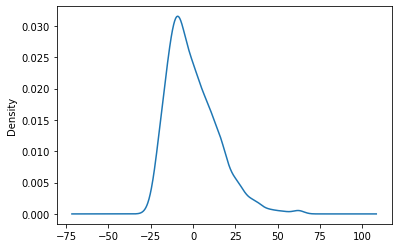

In [67]:
res.resid.plot(kind="kde")

In [68]:
final_data['sig_MVT_search_after_covid'] = np.where(final_data.dma.isin(sig_dma_list_MVT_GT), 1, 0)

In [69]:
did_data = final_data[['date','MVT_counts','sig_MVT_search_after_covid', 'covid_lock_down']].groupby('date').mean()

In [70]:
did_data['did'] = did_data['sig_MVT_search_after_covid']*did_data['covid_lock_down']

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = did_data[['sig_MVT_search_after_covid', 'covid_lock_down', 'did']]
y = did_data.MVT_counts

lr.fit(X, y)
lr.coef_  # the coefficient for gt is the DID, which is -0.41

array([ 0.        , -1.818753  , -0.41971223])

In [72]:
from statsmodels.formula.api import ols
ols = ols('MVT_counts ~ sig_MVT_search_after_covid + covid_lock_down + did', data=did_data).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             MVT_counts   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8839
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.348
Time:                        00:55:08   Log-Likelihood:                -501.35
No. Observations:                 172   AIC:                             1007.
Df Residuals:                     170   BIC:                             1013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Google Causal Impact Package

In [73]:
#!pip install pycausalimpact
# Data processing
import pandas as pd
import numpy as np
from datetime import datetime
# Create synthetic time-series data
from statsmodels.tsa.arima_process import ArmaProcess
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Causal impact
from causalimpact import CausalImpact
#https://grabngoinfo.com/time-series-causal-impact-analysis-in-python/

In [74]:
control_data = final_data[final_data['sig_MVT_search_after_covid'] == 0][['date', 'date2','MVT_counts', 'MVT_GT', 'time_delta_weeks', 'covid_lock_down']]
treatment_data = final_data[final_data['sig_MVT_search_after_covid'] == 1][['date', 'date2','MVT_counts', 'MVT_GT', 'time_delta_weeks', 'covid_lock_down']]
control_data_group = control_data[['date', 'date2','MVT_counts', 'MVT_GT', 'time_delta_weeks', 'covid_lock_down']].groupby('date').mean()
treatment_data_group = treatment_data[['date', 'date2','MVT_counts', 'MVT_GT', 'time_delta_weeks', 'covid_lock_down']].groupby('date').mean()

In [75]:
control_data_group.date2 = np.arange(1, 173)
treatment_data_group.date2 = np.arange(1, 173)

In [76]:
control_data_group

,date2,MVT_counts,MVT_GT,time_delta_weeks,covid_lock_down
date,,,,,
2017-01-02,1,55.6593,48.80380,0.0,0.0
2017-01-09,2,57.1659,43.66830,0.0,0.0
2017-01-16,3,55.9018,41.42050,0.0,0.0
2017-01-23,4,55.9033,34.04170,0.0,0.0
2017-01-30,5,51.3088,32.93440,0.0,0.0
...,...,...,...,...,...
2020-03-16,168,59.6254,30.35805,0.0,1.0
2020-03-23,169,59.9144,31.81050,1.0,1.0
2020-03-30,170,60.8302,28.37240,2.0,1.0


In [77]:
df

,date2,dma,MVT_counts,covid_lock_down,time_delta_weeks
0,736331,Austin TX,36.170,0,0
1,736331,Boston MA-Manchester NH,56.000,0,0
2,736331,Chicago IL,99.329,0,0
3,736331,Dallas-Ft. Worth TX,65.737,0,0
4,736331,Los Angeles CA,81.385,0,0
...,...,...,...,...,...
2231,737528,Nashville TN,25.137,1,4
2232,737528,Philadelphia PA,100.000,1,4
2233,737528,Phoenix AZ,72.414,1,4
2234,737528,San Francisco-Oakland-San Jose CA,56.209,1,4


In [78]:
mvt_count_model_control = smf.ols(formula='MVT_counts ~  date2 + covid_lock_down + time_delta_weeks', data=control_data_group)
mvt_count_model_treat = smf.ols(formula='MVT_counts ~  date2 + covid_lock_down + time_delta_weeks', data=treatment_data_group)

In [79]:
def plot_ITS(df, model, dependent_var, time_order,teatment_cutoff, accumulated_treat_time, start, end, dv_label, xlabel, ylabel):
    #set model
    #gun_vio_model = smf.ols(formula='gun_vio_rate ~  date2 + covid_lock_down + time_delta_months', data=df)
    res = model.fit()

    #t:date2 + d:covid_lock_down + p:time_delta_months


    start = start
    end = end
    beta = res.params

    # Get model predictions and 95% confidence interval
    predictions = res.get_prediction(df)
    summary = predictions.summary_frame(alpha=0.05)

    # mean predictions
    y_pred = predictions.predicted_mean

    # countefactual assumes no interventions
    cf_df = df.copy()
    cf_df[teatment_cutoff] = 0.0
    cf_df[accumulated_treat_time] = 0.0

    # counter-factual predictions
    cf = res.get_prediction(cf_df).summary_frame(alpha=0.05)
    
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots(figsize=(16,10))

    # Plot bounce rate data
    ax.scatter(df[time_order], df[dependent_var], facecolors='none', edgecolors='steelblue', label= dv_label, linewidths=2)

    ax.plot(df[time_order][:start], y_pred[:start], 'b-', label="model prediction")
    ax.plot(df[time_order][start:], y_pred[start:], 'b-')

    ax.plot(df[time_order][start:], cf['mean'][start:], 'k.', label="counterfactual")
    ax.fill_between(df[time_order][start:], cf['mean_ci_lower'][start:], cf['mean_ci_upper'][start:], color='k', alpha=0.1, label="counterfactual 95% CI");

    ax.axvline(x = 169, color = 'r', label = 'intervention')

    ax.legend(loc='best')
    
    
    plt.ylim([0, 100])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return res


    

    

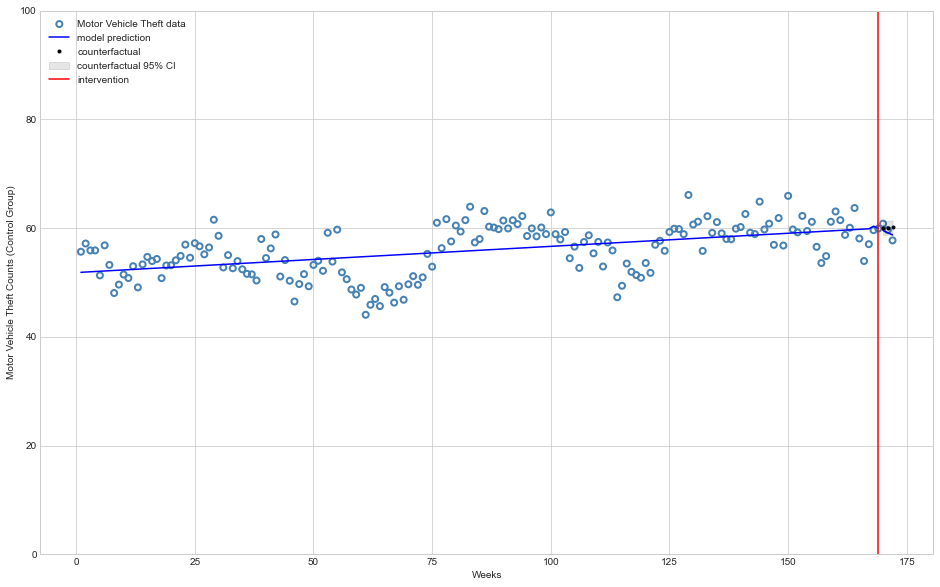

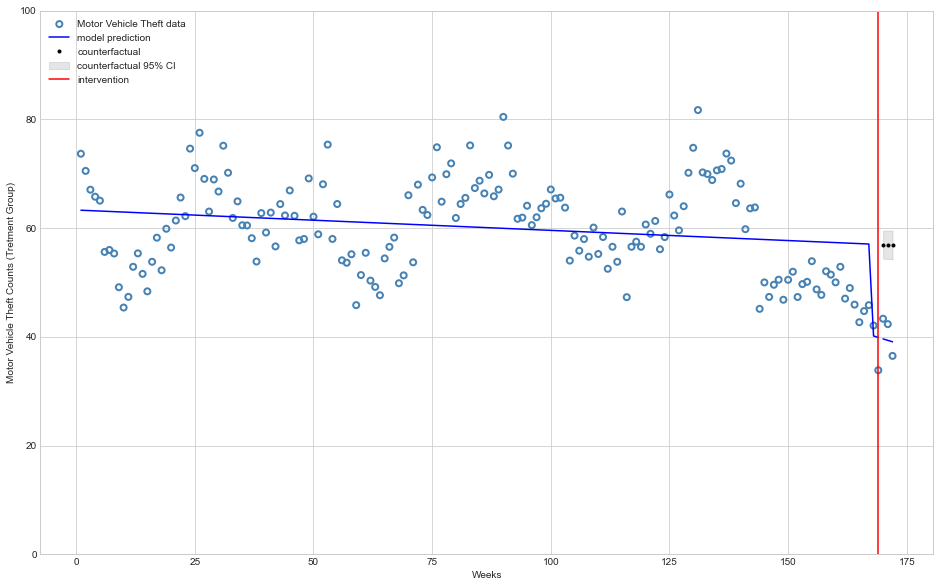

In [80]:
res1 = plot_ITS(control_data_group,
         mvt_count_model_control, 
         'MVT_counts', 
         'date2', 
         'covid_lock_down', 
         'time_delta_weeks', 
         169, 
         172, 
         'Motor Vehicle Theft data', 
         "Weeks", 
         "Motor Vehicle Theft Counts (Control Group)"
        )



res2 = plot_ITS(treatment_data_group,
         mvt_count_model_treat, 
         'MVT_counts', 
         'date2', 
         'covid_lock_down', 
         'time_delta_weeks', 
         169, 
         172, 
         'Motor Vehicle Theft data', 
         "Weeks", 
         "Motor Vehicle Theft Counts (Tretment Group)"
        )



<AxesSubplot:ylabel='Density'>

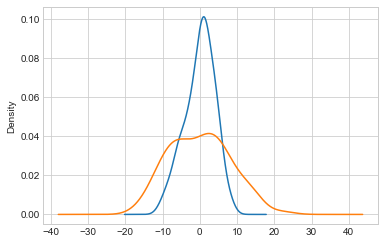

In [81]:
#check res
res1.resid.plot(kind="kde")
res2.resid.plot(kind="kde")

In [82]:
def check_res_plot(res):
    import altair as alt
    res1_df = res.resid.reset_index()
    res1_df = res1_df.rename(columns = {'date':'week', 0 :'residual'})
    
    rules = alt.Chart(pd.DataFrame({
        'residual': [0.0],
        'color': ['black']
    })).mark_rule().encode(
        y='residual',
        color=alt.Color('color:N', scale=None)
    )
    
    residual_plot  = alt.Chart(res1_df).mark_point().encode(
        x=alt.X('week'),
        y=alt.Y('residual')
    )
    
    sm.graphics.tsa.plot_acf(res.resid, lags=10)
    plt.show()
    
    sm.graphics.tsa.plot_pacf(res.resid, lags=10)
    plt.show()   
    
    return rules + residual_plot 


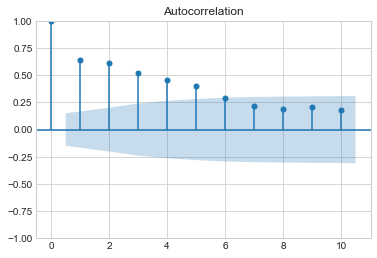

C:\Users\tosea\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


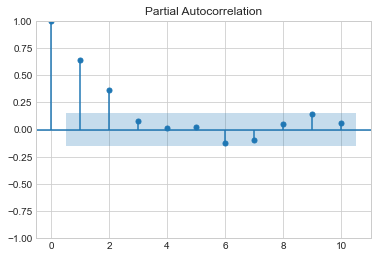

alt.LayerChart(...)

In [83]:
check_res_plot(res1)

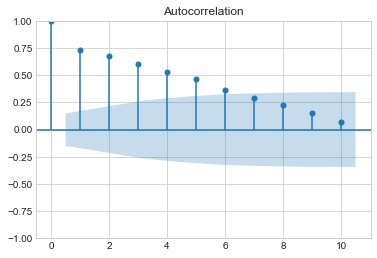

C:\Users\tosea\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


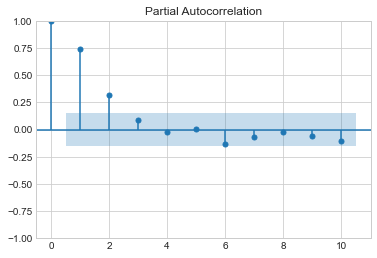

alt.LayerChart(...)

In [84]:
check_res_plot(res2)

In [85]:
final_data_group = final_data.groupby('date').mean()

C:\Users\tosea\AppData\Local\Temp\ipykernel_67604\2599471598.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_data_group = final_data.groupby('date').mean()


In [86]:
df = final_data_group.copy().reset_index()[['date', 'MVT_counts', 'MVT_GT', 'covid_lock_down', 'time_delta_weeks', 'date2']]

In [87]:
df.date2 = np.arange(1, 173)

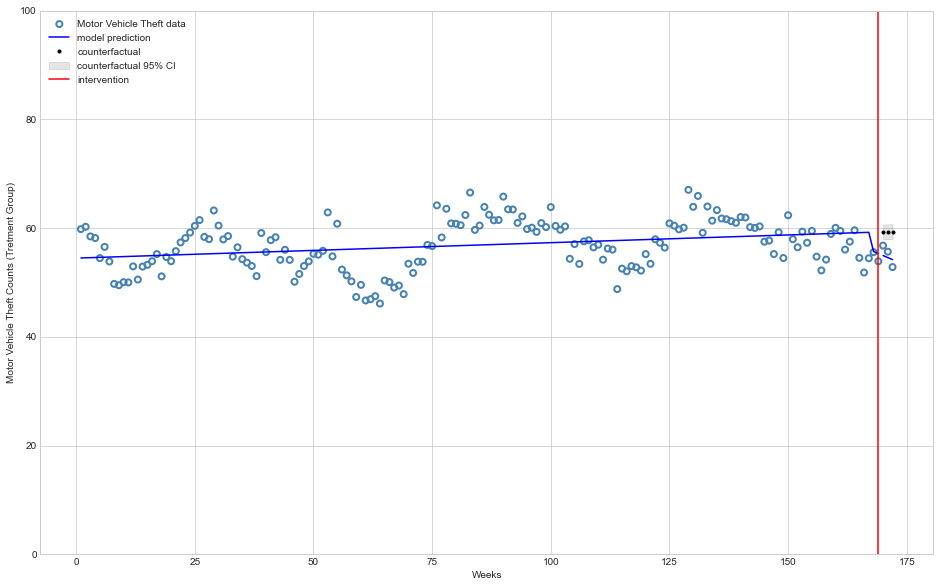

In [88]:
mvt_count_model = smf.ols(formula='MVT_counts ~  date2 + covid_lock_down + time_delta_weeks', data=df)
res2 = plot_ITS(df,
         mvt_count_model, 
         'MVT_counts', 
         'date2', 
         'covid_lock_down', 
         'time_delta_weeks', 
         169, 
         172, 
         'Motor Vehicle Theft data', 
         "Weeks", 
         "Motor Vehicle Theft Counts (Tretment Group)"
        )

In [89]:
df = df.set_index("date")

Text(0, 0.5, 'Motor Vehicle Theft Counts')

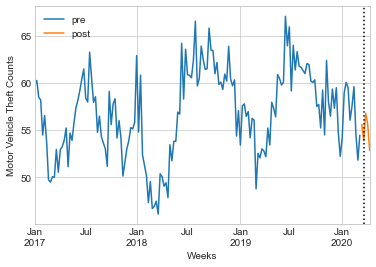

In [90]:

fig, ax = plt.subplots()
ax = df[df['covid_lock_down'] == 0]['MVT_counts'].plot(label="pre")
df[df['covid_lock_down' ]== 1]['MVT_counts'].plot(ax=ax, label="post")
ax.axvline(treatment_time, c="k", ls=":")
plt.legend()
plt.xlabel("Weeks")
plt.ylabel("Motor Vehicle Theft Counts")


Text(0, 0.5, 'Google Motor Vehicle Search')

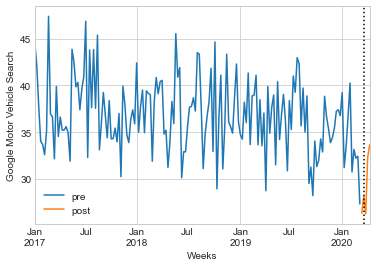

In [91]:
fig, ax = plt.subplots()
ax = df[df['covid_lock_down'] == 0]['MVT_GT'].plot(label="pre")
df[df['covid_lock_down' ]== 1]['MVT_GT'].plot(ax=ax, label="post")
ax.axvline(treatment_time, c="k", ls=":")
plt.legend()
plt.xlabel("Weeks")
plt.ylabel("Google Motor Vehicle Search")

C:\Users\tosea\AppData\Local\Temp\ipykernel_67604\2185076620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MVT_counts'], hist=True, kde=False,


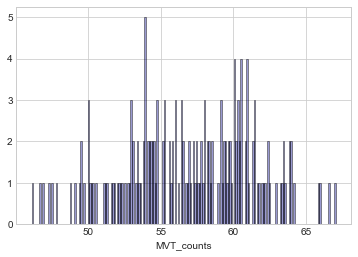

In [92]:
sns.distplot(df['MVT_counts'], hist=True, kde=False, 
             bins=200, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});

C:\Users\tosea\AppData\Local\Temp\ipykernel_67604\2514553817.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MVT_GT'], hist=True, kde=False,


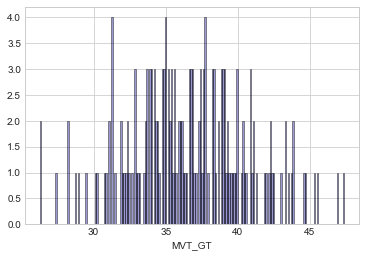

In [93]:
sns.distplot(df['MVT_GT'], hist=True, kde=False, 
             bins=200, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});

<AxesSubplot:xlabel='covid_lock_down', ylabel='MVT_counts'>

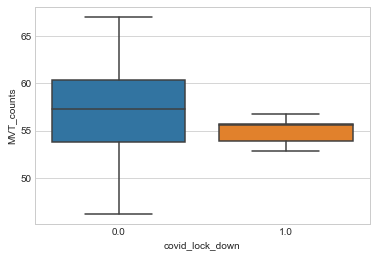

In [94]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES

sns.boxplot( x=df["covid_lock_down"], y=df['MVT_counts'] )



<AxesSubplot:xlabel='covid_lock_down', ylabel='MVT_GT'>

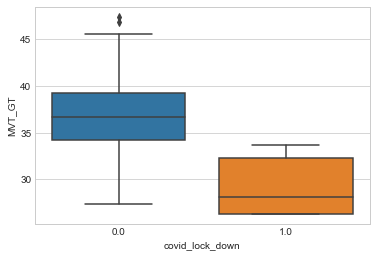

In [95]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES

sns.boxplot( x=df["covid_lock_down"], y=df['MVT_GT'] )



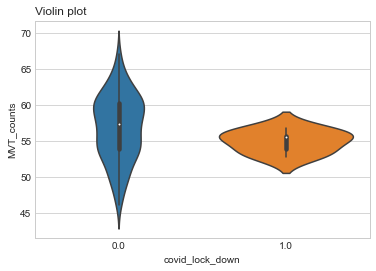

In [96]:
sns.violinplot( x="covid_lock_down", y='MVT_counts', data=final_data_group)

# add title
plt.title("Violin plot", loc="left")

# show the graph
plt.show()

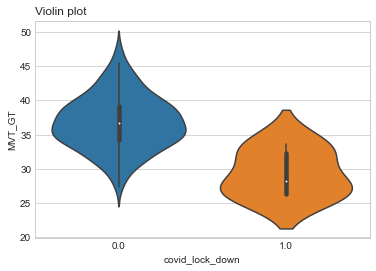

In [97]:
sns.violinplot( x="covid_lock_down", y='MVT_GT', data=final_data_group)

# add title
plt.title("Violin plot", loc="left")

# show the graph
plt.show()

In [98]:
#!pip install pycausalimpact
# Data processing
import pandas as pd
import numpy as np
from datetime import datetime
# Create synthetic time-series data
from statsmodels.tsa.arima_process import ArmaProcess
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Causal impact
from causalimpact import CausalImpact
#https://grabngoinfo.com/time-series-causal-impact-analysis-in-python/

In [120]:
df = pd.concat([treatment_data_group['MVT_counts'], control_data_group['MVT_counts']], axis = 1)

In [121]:
df.columns = ['y', 'X']

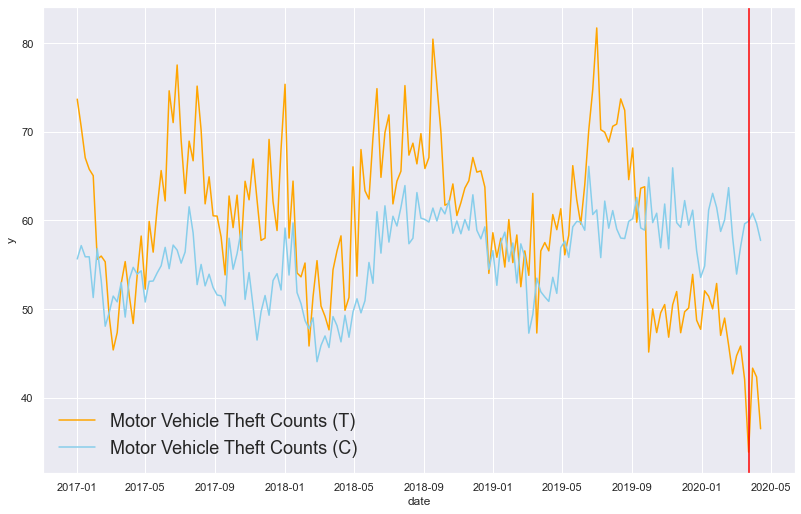

In [129]:
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=df.index, y=df['y'], color = 'orange', label = 'Motor Vehicle Theft Counts (T)')
sns.lineplot(x=df.index, y=df['X'], color = 'skyblue', label = 'Motor Vehicle Theft Counts (C)')

plt.legend(fontsize = 18)

plt.axvline(x= df.index[168], color='red')


In [130]:
df2 = pd.concat([treatment_data_group['MVT_GT'], control_data_group['MVT_GT']], axis = 1)

In [131]:
df2.columns = ['y', 'X']

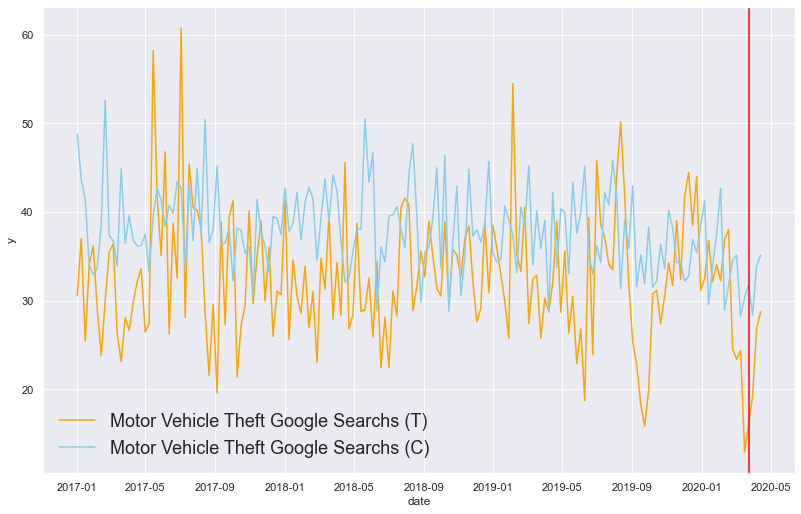

In [132]:
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=df2.index, y=df2['y'], color = 'orange', label = 'Motor Vehicle Theft Google Searchs (T)')
sns.lineplot(x=df2.index, y=df2['X'], color = 'skyblue', label = 'Motor Vehicle Theft Google Searchs (C)')

plt.legend(fontsize = 18)

plt.axvline(x= df2.index[168], color='red')


In [102]:
# Calculate the pre-daily average
pre_daily_avg = df['y'][:168].mean()
# Calculate the post-daily average
post_daily_avg = df['y'][169:].mean()

post_daily_avg - pre_daily_avg

print(f'the raw difference between the pre and the post treatment is {post_daily_avg - pre_daily_avg}')

the raw difference between the pre and the post treatment is -19.355176587301585


In [103]:
pre_period = [str(df.index.min())[:10], str(df.index[168])[:10]]
# Set post-period
post_period = [str(df.index[169])[:10], str(df.index.max())[:10]]

C:\Users\tosea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\tosea\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
C:\Users\tosea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


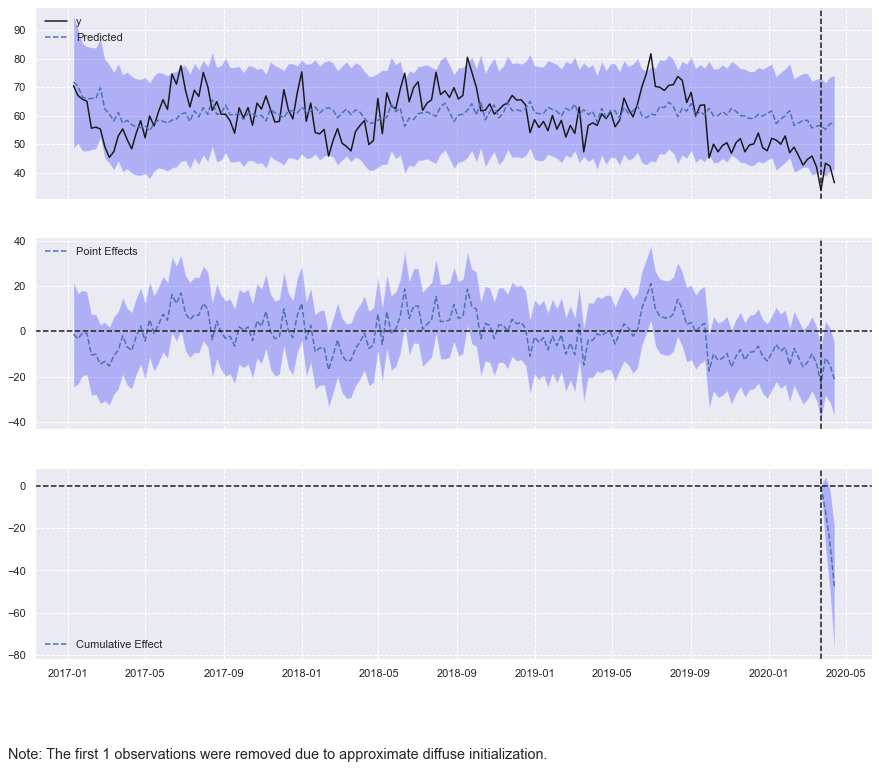

In [104]:
#Bayesian Structural Time Series Model (BSTS) 
impact = CausalImpact(data=df, pre_period=pre_period, post_period=post_period)
# Visualization
impact.plot()

In [105]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    40.73              122.18
Prediction (s.d.)         56.63 (5.06)       169.89 (15.17)
95% CI                    [46.93, 66.74]     [140.79, 200.23]

Absolute effect (s.d.)    -15.91 (5.06)      -47.72 (15.17)
95% CI                    [-26.02, -6.2]     [-78.06, -18.61]

Relative effect (s.d.)    -28.09% (8.93%)    -28.09% (8.93%)
95% CI                    [-45.94%, -10.95%] [-45.94%, -10.95%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [106]:
print(impact.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 40.73. By contrast, in the absence of an
intervention, we would have expected an average response of 56.63.
The 95% interval of this counterfactual prediction is [46.93, 66.74].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -15.91 with a 95% interval of
[-26.02, -6.2]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 122.18.
By contrast, had the intervention not taken place, we would have expected
a sum of 169.89. The 95% interval of this prediction is [140.79, 200.23].


The above results are given in terms of absolute numbers. In relative
terms, the response varia

In [107]:
'''
The actual post-intervention average is 39.01, 
and the predicted post-intervention average is 57.05.

The absolute causal effect is -18.04, 
which is exactly the true impact of -18.04, and a lillte bit lower than the raw difference of -21.070676587301577.

The relative causal effect is -31.62%.

The posterior probability of a causal effect is 100%, 
showing that the model is very confident that the causal impact exists.
'''

'\nThe actual post-intervention average is 39.01, \nand the predicted post-intervention average is 57.05.\n\nThe absolute causal effect is -18.04, \nwhich is exactly the true impact of -18.04, and a lillte bit lower than the raw difference of -21.070676587301577.\n\nThe relative causal effect is -31.62%.\n\nThe posterior probability of a causal effect is 100%, \nshowing that the model is very confident that the causal impact exists.\n'

## Fixed Effect Models -- DMA

In [108]:
#!pip install linearmodels
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import graphviz as gr
from linearmodels.datasets import wage_panel

%matplotlib inline
pd.set_option("display.max_columns", 6)
style.use("fivethirtyeight")

In [109]:
data = final_data.copy()

In [110]:
data

,date,dma,MVT_counts,...,time_delta_weeks,date2,sig_MVT_search_after_covid
0,2017-01-02,Austin TX,36.170,...,0,736331,0
1,2017-01-02,Boston MA-Manchester NH,56.000,...,0,736331,1
2,2017-01-02,Chicago IL,99.329,...,0,736331,1
3,2017-01-02,Dallas-Ft. Worth TX,65.737,...,0,736331,1
4,2017-01-02,Los Angeles CA,81.385,...,0,736331,0
...,...,...,...,...,...,...,...
2231,2020-04-13,Nashville TN,25.137,...,4,737528,0
2232,2020-04-13,Philadelphia PA,100.000,...,4,737528,0
2233,2020-04-13,Phoenix AZ,72.414,...,4,737528,0
2234,2020-04-13,San Francisco-Oakland-San Jose CA,56.209,...,4,737528,0


In [111]:
mod = smf.ols("MVT_counts ~ C(date)", data=data).fit()
mod.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,59.8199,5.073,11.792,0.000,49.871,69.768
C(date)[T.Timestamp('2017-01-09 00:00:00')],0.4303,7.174,0.060,0.952,-13.639,14.500
C(date)[T.Timestamp('2017-01-16 00:00:00')],-1.3406,7.174,-0.187,0.852,-15.410,12.729
C(date)[T.Timestamp('2017-01-23 00:00:00')],-1.6368,7.174,-0.228,0.820,-15.706,12.433
C(date)[T.Timestamp('2017-01-30 00:00:00')],-5.3389,7.174,-0.744,0.457,-19.408,8.730
C(date)[T.Timestamp('2017-02-06 00:00:00')],-3.2672,7.174,-0.455,0.649,-17.337,10.802
C(date)[T.Timestamp('2017-02-13 00:00:00')],-5.9503,7.174,-0.829,0.407,-20.020,8.119
C(date)[T.Timestamp('2017-02-20 00:00:00')],-10.0762,7.174,-1.405,0.160,-24.146,3.993
C(date)[T.Timestamp('2017-02-27 00:00:00')],-10.3203,7.174,-1.439,0.150,-24.390,3.749
C(date)[T.Timestamp('2017-03-06 00:00:00')],-9.7532,7.174,-1.359,0.174,-23.823,4.316


In [112]:
data.groupby("date")["MVT_counts"].mean()

date
2017-01-02    59.819923
2017-01-09    60.250231
2017-01-16    58.479308
2017-01-23    58.183154
2017-01-30    54.481000
                ...    
2020-03-16    55.577385
2020-03-23    53.902692
2020-03-30    56.792846
2020-04-06    55.666154
2020-04-13    52.841769
Name: MVT_counts, Length: 172, dtype: float64

In [113]:
data.groupby("dma").std().sum()

C:\Users\tosea\AppData\Local\Temp\ipykernel_67604\3533921262.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("dma").std().sum()


MVT_counts                     164.175954
MVT_GT                         170.965925
covid_lock_down                  2.190404
time_delta_weeks                 5.392080
date2                         4531.458889
sig_MVT_search_after_covid       0.000000
dtype: float64

In [114]:
Y = "MVT_counts"
T = "MVT_GT"
X = [T]

mean_data = data.groupby("dma")[X+[Y]].mean()
mean_data.head()

,MVT_GT,MVT_counts
dma,,
Austin TX,33.004262,51.515366
Boston MA-Manchester NH,27.461038,44.000000
Chicago IL,28.562837,63.434523
Dallas-Ft. Worth TX,41.258692,71.337959
Los Angeles CA,52.335977,72.982692


In [115]:
demeaned_data = (data.reset_index().set_index('dma')[X+[Y]] # set the index as the person indicator
                 - mean_data) # subtract the mean data

demeaned_data.head()

,MVT_GT,MVT_counts
dma,,
Austin TX,-0.433262,-15.345366
Austin TX,-0.433262,1.675634
Austin TX,8.995738,-13.217366
Austin TX,-9.004262,-18.536366
Austin TX,-9.379262,-18.536366


In [116]:
mod = smf.ols(f"{Y} ~ {'+'.join(X)}", data=demeaned_data).fit()
mod.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.455e-16,0.285,-8.6e-16,1.000,-0.559,0.559
MVT_GT,0.0248,0.022,1.146,0.252,-0.018,0.067


In [117]:
from linearmodels.panel import PanelOLS
mod = PanelOLS.from_formula("MVT_counts ~  MVT_GT",
                            data=data.set_index(["dma", "date"]))

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
MVT_GT,1.3637,0.0696,19.579,0.0000,1.2271,1.5003


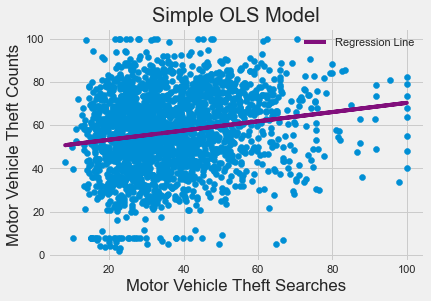

In [118]:
m = smf.ols("MVT_counts ~  MVT_GT", data=data).fit()

plt.scatter(data.MVT_GT, data.MVT_counts)
plt.plot(data.MVT_GT, m.fittedvalues, c="C5", label="Regression Line")
plt.xlabel("Motor Vehicle Theft Searches")
plt.ylabel("Motor Vehicle Theft Counts")
plt.title("Simple OLS Model")
plt.legend();

In [119]:
mod = PanelOLS.from_formula("MVT_counts ~  MVT_GT + EntityEffects + TimeEffects",
                            data=data.set_index(["dma", "date"]))

result = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
MVT_GT,0.0229,0.0196,1.1679,0.2430,-0.0155,0.0612
